In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-localapprox-pwlin)=
# Piecewise linear interpolation

```{index} interpolation; by piecewise polynomials
```

```{index} ! piecewise linear interpolant
```

Piecewise linear interpolation is simply a game of connect-the-dots. That is, the data points are joined pairwise by line segments.

::::{proof:definition} Piecewise linear interpolant
Given nodes $t_0 < t_1 < \cdots < t_n$, the **piecewise linear** interpolant $p(x)$ is given by

```{math}
:label: pwlinear
p(x) = y_k + \frac{y_{k+1}-y_k}{t_{k+1}-t_k}(x-t_k) \quad \text{ for } x\in[t_k,t_{k+1}].
```
::::

It should be clear from {eq}`pwlinear` that on each interval $[t_k,t_{k+1}]$, $p(x)$ is a linear function passing through both $(t_k,y_k)$ and $(t_{k+1},y_{k+1})$.

## Hat functions

Rather than basing an implementation on {eq}`pwlinear`, we return to the idea used in {numref}`Demo %s <demo-interp-vander>` of choosing the interpolant from among the linear combinations of a preselected finite set of functions. In the present context we use, for $k=0,\ldots,n$,

```{math}
:label: hatfun
  H_k(x) =
  \begin{cases}
    \dfrac{x-t_{k-1}}{t_k-t_{k-1}} & \text{if $x\in[t_{k-1},t_k]$},\\[2.5ex]
    \dfrac{t_{k+1}-x}{t_{k+1}-t_{k}} & \text{if $x\in[t_{k},t_{k+1}]$},\\[2.5ex]
    0 & \text{otherwise}.
  \end{cases} \qquad  
```

```{index} hat functions
```

The functions $H_0,\ldots,H_n$ are called **hat functions**. They depend on the node vector $\mathbf{t}$, but this dependence is not usually indicated explicitly.

Each hat function is globally continuous and is linear inside every interval $[t_k,t_{k+1}]$.  Consequently, any linear combination of them will have the same property. Furthermore, *any* such function is expressible as a unique linear combination of hat functions, i.e.,

```{math}
  :label: plbasis
  \sum_{k=0}^n c_k H_k(x)
```

for some choice of the coefficients $c_0,\ldots,c_n$. No smaller set of functions can have the same properties. We summarize these facts by calling the hat functions a **basis** of the set of functions that are continuous and piecewise linear relative to $\mathbf{t}$.  Another point of view, familiar from abstract linear algebra, is that a basis sets up a one-to-one correspondence between the spanned function space and the more familiar space $\mathbb{R}^{n+1}$, with each function being represented by its coefficients $c_0,\ldots,c_n$.

{numref}`Function {number} <function-hatfun>` presents a simple implementation of hat functions. The inputs are a presorted vector of nodes and a value of $k$ between 0 and $n$, which represent the indices of the endpoints. The return value is a function of $x$ that can be evaluated as needed. Note that we have not formally defined values for a hat function outside of the node interval; our choice in {numref}`Function {number} <function-hatfun>` is to make it zero there.

(function-hatfun)=

````{proof:function} hatfun
**Hat function/piecewise linear basis function**

```{code-block} julia1
:lineno-start: 1
"""
    hatfun(t,k)

Create a piecewise linear hat function, where `t` is a
vector of n+1 interpolation nodes and `k` is an integer in 0:n
giving the index of the node where the hat function equals one.
"""

function hatfun(t,k)
    n = length(t)-1
    return function(x)
        if k > 0 && t[k] ≤ x ≤ t[k+1]
            return (x-t[k])/(t[k+1]-t[k])
        elseif k < n && t[k+1] ≤ x ≤ t[k+2]
            return (t[k+2]-x)/(t[k+2]-t[k+1])
        else
            return 0
        end
    end
end
````

(demo-pwlin-hat)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let's define a set of four nodes (i.e., $n=3$ in our formulas).

```{index} ! Julia; annotate!
```

In [2]:
t = [0, 0.55, 0.7, 1]

4-element Vector{Float64}:
 0.0
 0.55
 0.7
 1.0

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
We plot the hat functions $H_0,\ldots,H_3$.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Use `annotate!` to add text to a plot.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

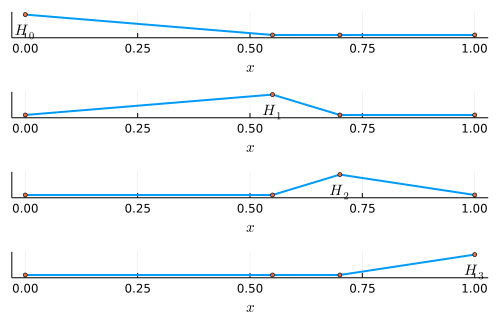

In [3]:
plt = plot(layout=(4,1),legend=:top,
    xlabel=L"x",ylims=[-0.1,1.1],ytick=[])
for k in 0:3
  Hₖ = FNC.hatfun(t,k)
  plot!(Hₖ,0,1,subplot=k+1)
  scatter!(t,Hₖ.(t),m=3,subplot=k+1)
  annotate!(t[k+1],0.25,text(latexstring("H_$k"),10),subplot=k+1)
end
plt

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Cardinality conditions

```{index} cardinal function
```

A handy property of the hat functions is that they are cardinal functions for piecewise linear interpolation, since they satisfy the cardinality conditions

```{math}
:label: cardinalcond
H_k(t_i) =
\begin{cases}
  1 &\text{if $i=k$,}\\
  0 & \text{otherwise.}
\end{cases}
```

All candidate piecewise linear (PL) functions can be expressed as a linear combination such as {eq}`plbasis` for some coefficients $c_0,\ldots,c_n$. But because of the cardinality conditions and the necessity for $p(x)$ to interpolate the data values in $\mathbf{y}$, expressing the interpolant using the hat functions is trivial:

```{math}
  :label: plbasissol
  p(x) = \sum_{k=0}^n y_k H_k(x).
```

(demo-pwlin-usage)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We generate a piecewise linear interpolant of $f(x)=e^{\sin 7x}$.

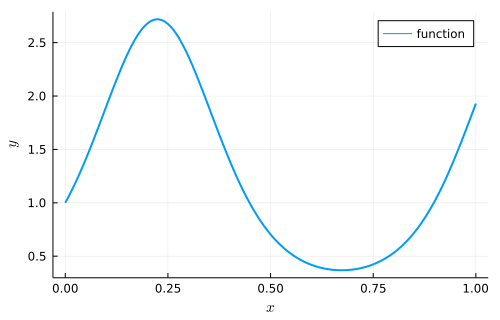

In [4]:
f = x -> exp(sin(7*x))

plot(f,0,1,label="function",xlabel=L"x",ylabel=L"y")

First we sample the function to create the data.

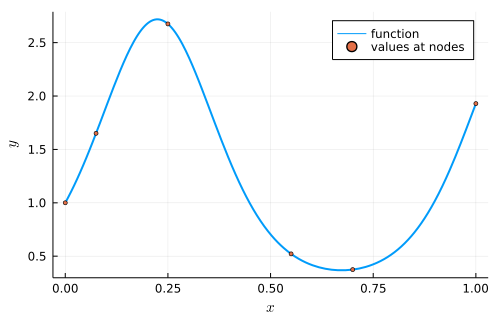

In [5]:
t = [0, 0.075, 0.25, 0.55, 0.7, 1]    # nodes
y = f.(t)                             # function values

scatter!(t,y,label="values at nodes")

Now we create a callable function that will evaluate the piecewise linear interpolant at any $x$, and then plot it.

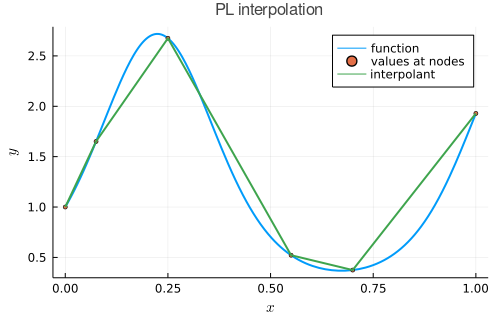

In [6]:
p = FNC.plinterp(t,y)
plot!(p,0,1,label="interpolant",title="PL interpolation")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The resulting algorithmic simplicity is reflected in {numref}`Function {number} <function-plinterp>`. Take note that the output of {numref}`Function {number} <function-plinterp>` is itself a function, meant to be called with a single argument representing a value of $x$. Our mathematical viewpoint is that the result of an interpolation process is a function, and our codes reflect this.

A final appealing characteristic of the hat function basis is that it depends only on the node locations, while the expansion coefficients in {eq}`plbasis` depend only on the data values. This clean separation would be useful if we wanted to construct many interpolants on the same node set, and it has deeper theoretical uses as well.

(function-plinterp)=

````{proof:function} plinterp
**Piecewise linear interpolation**

```{code-block} julia1
:lineno-start: 1
"""
    plinterp(t,y)

Construct a piecewise linear interpolating function for data values in
`y` given at nodes in `t`.
"""
function plinterp(t,y)
    n = length(t)-1
    H = [ hatfun(t,k) for k in 0:n ]
    return x -> sum( y[k+1]*H[k+1](x) for k in 0:n )
end
```
````

## Conditioning and convergence

The condition number bounds from {numref}`Theorem %s <theorem-interp-conditioning>` are very simple for piecewise linear interpolation because the interpolant of the data $\mathbf{e}_k$ is just the hat function $H_k$. Hence $1\le \kappa \le n+1$. However, there is an even simpler result.

```{index} condition number; of interpolation
```

(theorem-plcondition)=
````{proof:theorem} Conditioning of PL interpolation
The absolute condition number of piecewise linear interpolation in the infinity norm equals 1. More specifically, if $\mathcal{I}$ is the piecewise linear interpolation operator, then 

```{math}
:label: plcondition
\| \mathcal{I}(\mathbf{y}+\mathbf{z}) - \mathcal{I}(\mathbf{y}) \|_\infty = \|\mathbf{z}\|_\infty.
```

(The norm on the left side is on functions, while the norm on the right side is on vectors.)
````

````{proof:proof}

By linearity,

```{math}
\mathcal{I}(\mathbf{y}+\mathbf{z}) - \mathcal{I}(\mathbf{y}) = \mathcal{I}(\mathbf{z}) = \sum_{k=0}^n z_k H_k(x).
```

Call this piecewise linear function $p(x)$. Consider a maximum element of $\mathbf{z}$, i.e., choose $i$ such that $|z_i|=\|\mathbf{z}\|_\infty$. Then $|p(t_i)|=\|\mathbf{z}\|_\infty$. Hence $\|p\|_\infty\ge \|\mathbf{z}\|_\infty$. Now consider

```{math}
|p(x)| = \left|\sum_{k=0}^n z_k H_k(x)\right| \le \sum_{k=0}^n |z_k| H_k(x) \le \|\mathbf{z}\|_\infty \sum_{k=0}^n H_k(x) = \|\mathbf{z}\|_\infty.
```

You are asked to prove the final step above in [Exercise 4](problem-plpartunity). We conclude that  $\|p\|_\infty\le \|\mathbf{z}\|_\infty$, so that $\|p\|_\infty = \|\mathbf{z}\|_\infty$, which completes the proof.
````

Now suppose that $f$ is a "nice" function on an interval $[a,b]$ containing all of the nodes. We can sample values of $f$ to get data, i.e., $y_k=f(t_k)$ for all $k$, then perform piecewise linear interpolation of the data to get a different function, the interpolant $p$. How close is $p$ to the original $f$? 

To make a simple statement, we will consider only the case of equally spaced nodes covering the interval. It turns out that piecewise linear interpolation converges at second order in the spacing of the nodes.

(theorem-pwlin-converge)=
````{proof:theorem} Convergence of PL interpolation
Suppose that $f(x)$ has a continuous second derivative in $[a,b]$ (often expressed as $f\in C^2([a,b])$). Let $p_n(x)$ be the piecewise linear interpolant of $\bigl(t_i,f(t_i)\bigr)$ for $i=0,\ldots,n$, where $t_i=a+i h$ and $h=(b-a)/n$. Then
  
```{math}
:label: placcuracy
\bigl\| f - p_n \bigr\|_\infty = \max_{x \in [a,b]}
|f(x)-p(x)| \le M h^2,
```

where $M = \bigl\| f'' \bigr\|_\infty$.
````

For an outline of a proof, see [Exercise 5](problem-pwlin-placcuracy).

We normally don't have access to $f''$, so the importance of {numref}`Theorem %s <theorem-pwlin-converge>` is that the error in the interpolant is $O(h^2)$ as $h\to 0$. 

```{index} ! convergence rate; algebraic, ! order of accuracy; of an approximation
```

(definition-pwlin-algconv)=
::::{proof:definition} Algebraic convergence
If an approximation has error that is $O(h^m)$ as $h\to 0$ for an integer $m$ and a discretization size parameter $h$, then we say the approximation has **algebraic convergence**. If the error is not also $O(h^{m+1})$, then $m$ is the **order of accuracy**.
::::

Thus, {numref}`Theorem {number} <theorem-pwlin-converge>` states that piecewise linear interpolation is second-order accurate. For instance, if we increase the number of equally spaced nodes by a factor of 10, the piecewise linear interpolant becomes about 100 times more accurate. Note also that if $y \approx C h^m$, then 

$$
\log y \approx m (\log h) + \log C.
$$

Hence a log-log graph of error versus $h$ should be approximately a straight line of slope $m$.

(demo-pwlin-converge)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$ over $x \in [0,1]$.

In [7]:
f = x -> exp(sin(7*x))
x = range(0,1,length=10001)  # sample the difference at many points
n = @. round(Int,10^(1:0.25:3.5))
maxerr = zeros(0)
for n in n
    t = (0:n)/n    # interpolation nodes
    p = FNC.plinterp(t,f.(t))
    err = @. f(x)-p(x)
    push!(maxerr,norm(err,Inf) )
end

data = (n=n[1:4:end],err=maxerr[1:4:end])
pretty_table(data,["n","max-norm error"])

┌──────┬────────────────┐
│    n │ max-norm error │
├──────┼────────────────┤
│   10 │       0.150471 │
│  100 │     0.00166421 │
│ 1000 │     1.66494e-5 │
└──────┴────────────────┘


As predicted, a factor of 10 in $n$ produces a factor of 100 in the error. In a convergence plot, it is traditional to have $h$ *decrease* from left to right, so we expect a straight line of slope $-2$ on a log-log plot.

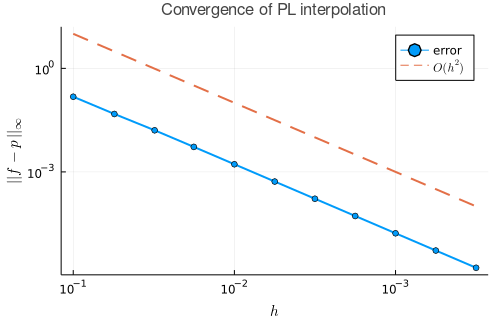

In [8]:
h = @. 1/n
order2 = @. 10*(h/h[1])^2

plot(h,maxerr,m=:o,label="error")
plot!(h,order2,l=:dash,label=L"O(h^2)",xflip=true,
    xaxis=(:log10,L"h"),yaxis=(:log10,L"|| f-p\, ||_\infty"),
    title="Convergence of PL interpolation")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

1. ⌨ For each given function and interval, perform piecewise linear interpolation using {numref}`Function {number} <function-plinterp>` for $n+1$ equispaced nodes with $n=10,20,40,80,160,320$. For each $n$, estimate the error

    ```{math}
    E(n) = \| f-p \|_\infty = \max_x | f(x) - p(x) |
    ```

    by evaluating the function and interpolant at 1600 points in the interval. Make a log-log plot of $E$ as a function of $n$ and add the line $E=Cn^{-2}$ for a constant $C$ of your choosing.

    **(a)** $\cos(\pi x^2)$ on $[0,4]$

    **(b)** $\log(x)$ on $[1,20]$

    **(c)** $\sin\left(\frac{1}{x}\right)$ on $\left[\frac{1}{2},7\right]$

2. ✍ For this problem, let $H(x)$ be the hat function that passes through the three points $(-1,0)$, $(0,1)$, and $(1,0)$.

    **(a)** Write out a piecewise definition of $H$ in the style of {eq}`hatfun`.

    **(b)** Define the function $Q$ by $Q(x) = \int_{x-1}^x H(t)\, dt$. Find a piecewise formula for $Q(x)$. (Hint: Perform the integration separately for the cases $-1\le x \le 0$, $0\le x \le 1$, etc.)

    **(c)** Make a sketch of $Q(x)$ for $-2\le x \le 2$.

    **(d)** Show that $Q$ is continuous. Are $Q'$ and $Q''$?
  
3. ✍ Before electronic calculators, the function $\ln(x)$ was often computed using piecewise linear interpolation with a table of values. If you were using such a table at the nodes $3.1,3.2,\ldots,3.9,4$, what is an upper bound on the error in the result?

    (problem-plpartunity)=
4. ✍ Show that for any node distribution and any $x\in[t_0,t_n]$,
  
    ```{math}
    :label: plpu
    \sum_{k=0}^n H_k(x) = 1.
    ```

    (Hint: The simplest way is to apply {eq}`plbasissol`.) This is called the **partition of unity** property.

    (problem-pwlin-placcuracy)=
5. ✍ Here we consider a proof of {numref}`Theorem %s <theorem-pwlin-converge>` using the mean value theorems from elementary calculus: If $f$ is continuously differentiable in $(a,b)$, then there exist points $s$ and $t$ in $(a,b)$ such that
  
    ```{math}
    \int_a^b f(z) \, dz = (b-a)f(s) \qquad \text{and} \qquad f'(t) = \frac{f(b)-f(a)}{b-a}.
    ```

    For the following, suppose $x \in (t_k,t_{k+1})$.

    **(a)** Show that for some $s \in (t_k,t_{k+1})$,

    ```{math}
    f(x) = y_k + (x-t_k)f'(s).
    ```

    **(b)** Show that for some other values $u$ and $v$ in $(t_k,t_{k+1})$,

    ```{math}
    f'(s) -  \frac{y_{k+1}-y_k}{t_{k+1}-t_k} = (s-u) f''(v).
    ```

    **(c)** Use {eq}`pwlinear` to finish the proof of the theorem.